BUILDING DATA FRAMES FROM SCRATCH

In [224]:
import pandas as pd
from IPython.display import display

# data frames from dictionary
country = ["Spain","France"]
population = ["11","12"]
list_label = ["country","population"]
list_col = [country,population]
zipped = list(zip(list_label,list_col))
data_dict = dict(zipped)
df = pd.DataFrame(data_dict)
display(df)


# kolonları liste haline getir ve sonra tek bir listede birleştir
# kolon isimlerini liste haline getir ve önceki liste ile ziple ve ardından liste haline dönüştür sonra dictionary haline getir 
# ve df e dönüşmeye hazır 

brand= ['opel','mercedes','fiat']
model=['1997','1998',1999]
price=['12000',65000,'77000']

labels=['brand','model','price']
list_columns=[brand,model,price]
print('list_columns = ',list_columns)

zip_car=list(zip(labels,list_columns))
print('zip_car = ',zip_car)

car_dict=dict(zip_car)
print('car_dict = ',car_dict)

df_car=pd.DataFrame(car_dict)
display(df_car)
print(df_car.dtypes)

dict_grades={'Tests':['Test 1','Test 2',"Test 3","Test 4"],'Grades' : [40,57,99,float('NAN')]}

df_grades=pd.DataFrame(dict_grades)
display(df_grades)
print(df_grades.dtypes)




,country,population
0,Spain,11
1,France,12


list_columns =  [['opel', 'mercedes', 'fiat'], ['1997', '1998', 1999], ['12000', 65000, '77000']]
zip_car =  [('brand', ['opel', 'mercedes', 'fiat']), ('model', ['1997', '1998', 1999]), ('price', ['12000', 65000, '77000'])]
car_dict =  {'brand': ['opel', 'mercedes', 'fiat'], 'model': ['1997', '1998', 1999], 'price': ['12000', 65000, '77000']}


,brand,model,price
0,opel,1997,12000
1,mercedes,1998,65000
2,fiat,1999,77000


brand    object
model    object
price    object
dtype: object


,Tests,Grades
0,Test 1,40.0
1,Test 2,57.0
2,Test 3,99.0
3,Test 4,NaN


Tests      object
Grades    float64
dtype: object


In [225]:
# Add new columns
df["capital"] = ["madrid","paris"]
display(df)

new_df=pd.DataFrame({'Tests':['test 5'],'Grades':[66]})
display(new_df)


df_grades=pd.concat([df_grades,new_df],axis=0)
display(df_grades)

res='10'
df_grades['result']=['pass' if grade > 50  else 'Not pass' for grade in df_grades['Grades']  ]
df_grades


,country,population,capital
0,Spain,11,madrid
1,France,12,paris


,Tests,Grades
0,test 5,66


,Tests,Grades
0,Test 1,40.0
1,Test 2,57.0
2,Test 3,99.0
3,Test 4,NaN
0,test 5,66.0


,Tests,Grades,result
0,Test 1,40.0,Not pass
1,Test 2,57.0,pass
2,Test 3,99.0,pass
3,Test 4,NaN,Not pass
0,test 5,66.0,pass


In [226]:
# Broadcasting
df["income"] = 0 #Broadcasting entire column
df

,country,population,capital,income
0,Spain,11,madrid,0
1,France,12,paris,0


VISUAL EXPLORATORY DATA ANALYSIS

In [227]:
import os 

# bu şekilde csv dosyalarında istediğimizi seçebileceğimiz bir arayüz sağlayabiliriz 
files=[]

for root,dir,filenames in os.walk('.'):
    for filename in filenames :
        if filename.find('csv') != -1:
            files.append(filename)

for i in range(len(files)):
    print("Press {0} for {1}".format(i,files[i]))

#x=int(input(''))
x=1
print("Selected {}".format(files[x]))

data=pd.read_csv('{}'.format(files[x]))
data.head()
data.index



Press 0 for combats.csv
Press 1 for pokemon.csv
Press 2 for tests.csv
Selected pokemon.csv


RangeIndex(start=0, stop=800, step=1)

<AxesSubplot:>

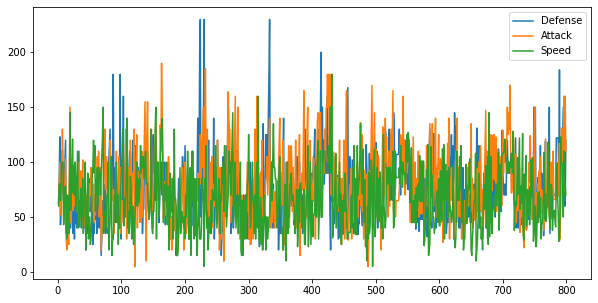

In [228]:
import matplotlib.pyplot as plt
# Plotting all data 

# loc [rows,collomns]
data1 = data.loc[range(1,data[data.columns[0]].count(),1),['Defense','Attack','Speed']] # dataframe döndürmesi için kolonlar [] içinde yazılabilir


data1.plot(figsize=(10,5))
# it is confusing

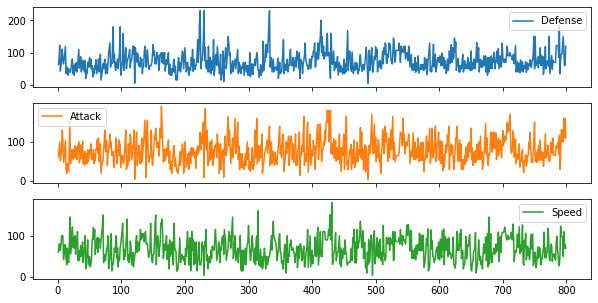

In [229]:
# subplots
data1.plot(subplots = True,figsize=(10,5))
plt.show()


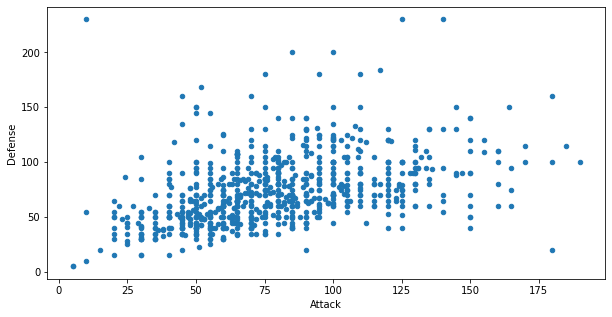

In [230]:
# scatter plot  
data1.plot(kind = "scatter",x="Attack",y = "Defense",figsize=(10,5))
plt.show()

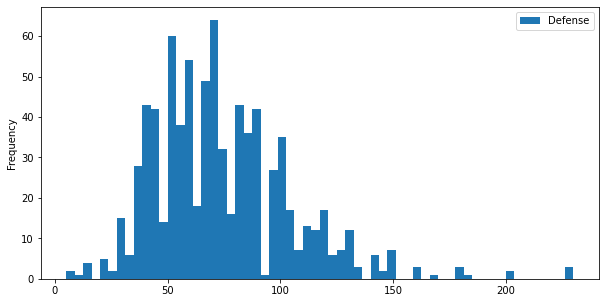

In [231]:
# hist plot  
# minimum ve maximum defense değerlerini kullanarak aralığı daha güzel ayarlayabiliriz 
data1.plot(kind = "hist",y = "Defense",bins = 60,range= (data1['Defense'].min(),data1['Defense'].max()),figsize=(10,5))  
plt.show()



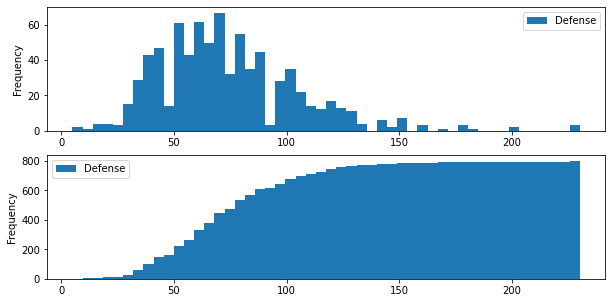

In [232]:
# histogram subplot with non cumulative and cumulative
fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(10,5))
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (data1['Defense'].min(),data1['Defense'].max()),ax = axes[0])
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (data1['Defense'].min(),data1['Defense'].max()),ax = axes[1],cumulative = True)
plt.savefig('graph.png')
plt.show()

STATISTICAL EXPLORATORY DATA ANALYSIS

In [233]:
data.describe() 
# verinin 
# miktar , ortalama , standart sapma ,min , Q1 , Q2(medyan) , Q3 ve max değerlerini gösterir 

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


INDEXING PANDAS TIME SERIES

In [234]:
# bu şekilde çeşitli şekilerde yazılabilir 
time_list = ["1992-03-08","1992.04.12","1992/04/12","19920412","04/12/1992","april-12-1992","apr-12-1992","12april1992",""]
print(time_list)
print(type(time_list[1])) # As you can see date is string
# however we want it to be datetime object
datetime_object = pd.to_datetime(time_list)
print(type(datetime_object))
print(datetime_object)

['1992-03-08', '1992.04.12', '1992/04/12', '19920412', '04/12/1992', 'april-12-1992', 'apr-12-1992', '12april1992', '']
<class 'str'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['1992-03-08', '1992-04-12', '1992-04-12', '1992-04-12',
               '1992-04-12', '1992-04-12', '1992-04-12', '1992-04-12',
                      'NaT'],
              dtype='datetime64[ns]', freq=None)


In [235]:
# close warning
import warnings
warnings.filterwarnings("ignore")
# In order to practice lets take head of pokemon data and add it a time list
data2 = data.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]

datetime_object = pd.to_datetime(date_list,format='%Y/%m/%d')  # farklı bir format girdiğmizde format='' paremetresiyle ayarlayabiliriz  
data2["date"] = datetime_object
# lets make date as index
data2= data2.set_index("date")
data2.head()



,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1992-02-10,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
1992-03-10,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
1993-03-15,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
1993-03-16,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [236]:
# Now we can select according to our date index
display(data2.loc[["1993-03-16"]]) # [] ile dataframe haline getirip bastırdık
display(data2.loc["1992-03-10":"1993-03-16"])

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1993-03-16,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-03-10,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
1993-03-15,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
1993-03-16,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


RESAMPLING PANDAS TIME SERIES

In [237]:
display(data2)
# We will use data2 that we create at previous part
display(data2.resample("A").mean()) # yıllık bazda ortalaması alınabilir özelliklerin ortalamasını veriyor 
display(data2.resample("A").quantile(0.25)) # yıllık bazda q1 değeri


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1992-02-10,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
1992-03-10,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
1993-03-15,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
1993-03-16,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-12-31,2.0,61.666667,64.333333,65.0,81.666667,81.666667,61.666667,1.0,0.0
1993-12-31,4.5,59.500000,76.000000,83.0,91.000000,85.000000,72.500000,1.0,0.0


,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-12-31,1.50,52.50,55.5,56.0,72.5,72.5,52.50,1.0,0.0
1993-12-31,4.25,49.25,64.0,63.0,75.5,67.5,68.75,1.0,0.0


In [241]:
# Lets resample with month
display(data2.resample("M").mean())
# As you can see there are a lot of nan because data2 does not include all months

# NaN değerleri kaldırarak daha düzel bir tablo elde edebiliriz 
display(data2.resample("M").mean().dropna())

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1992-02-29,2.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
1992-03-31,3.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
1992-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1992-02-29,2.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
1992-03-31,3.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
1993-03-31,4.5,59.5,76.0,83.0,91.0,85.0,72.5,1.0,0.0


In [253]:
# In real life (data is real. Not created from us like data2) we can solve this problem with interpolate
# We can interpolete from first value

# .first() methodu istenilen kadar satır dönderir default olarak tümünü dönderir
# bu şekilde eksik verileri tamamlayabiliriz 
display(data2.resample("M").first().interpolate("linear"))

# krogh , piecewise_polynomial , spline , pchip ve akima gibi metodlar da eksik verileri tamamlayabilmek için kullanılabilir 
display(data2.resample("M").first().interpolate(method='polynomial', order=2))
display(data2.resample("M").first().interpolate(method='spline', order=2))
display(data2.resample("M").first().interpolate(method='krogh', order=2))

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-31,1.000000,Bulbasaur,Grass,Poison,45.000000,49.000000,49.000000,65.000000,65.000000,45.000000,1.0,0.0
1992-02-29,2.000000,Ivysaur,Grass,Poison,60.000000,62.000000,63.000000,80.000000,80.000000,60.000000,1.0,0.0
1992-03-31,3.000000,Venusaur,Grass,Poison,80.000000,82.000000,83.000000,100.000000,100.000000,80.000000,1.0,0.0
1992-04-30,3.839987,None,None,None,97.242441,99.707140,100.817723,117.485813,117.463688,97.242441,1.0,0.0
1992-05-31,4.565388,None,None,None,111.815307,114.951129,116.495407,132.604602,132.532848,111.815307,1.0,0.0
1992-06-30,5.129402,None,None,None,122.778411,126.748484,129.021588,144.380963,144.235276,122.778411,1.0,0.0
1992-07-31,5.569630,None,None,None,130.862629,135.885695,139.231346,153.599985,153.351135,130.862629,1.0,0.0
1992-08-31,5.864935,None,None,None,135.649336,141.919462,146.662322,159.820765,159.441545,135.649336,1.0,0.0
1992-09-30,6.012727,None,None,None,137.141966,144.803699,151.207819,162.986149,162.454860,137.141966,1.0,0.0


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-31,1.000000,Bulbasaur,Grass,Poison,45.000000,49.000000,49.000000,65.000000,65.000000,45.000000,1.0,0.0
1992-02-29,2.000000,Ivysaur,Grass,Poison,60.000000,62.000000,63.000000,80.000000,80.000000,60.000000,1.0,0.0
1992-03-31,3.000000,Venusaur,Grass,Poison,80.000000,82.000000,83.000000,100.000000,100.000000,80.000000,1.0,0.0
1992-04-30,3.794559,None,None,None,93.688454,96.153721,97.262858,113.932365,113.910370,93.688454,1.0,0.0
1992-05-31,4.490966,None,None,None,105.993053,109.129807,110.671716,126.783233,126.711691,105.993053,1.0,0.0
1992-06-30,5.033370,None,None,None,115.265558,119.236833,121.506881,136.869250,136.723837,115.265558,1.0,0.0
1992-07-31,5.457931,None,None,None,122.124134,127.148599,130.490695,144.862818,144.614285,122.124134,1.0,0.0
1992-08-31,5.744342,None,None,None,126.215059,132.486695,137.225717,150.387922,150.009044,126.215059,1.0,0.0
1992-09-30,5.889976,None,None,None,127.538847,135.202117,141.602330,153.384489,152.853549,127.538847,1.0,0.0


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-31,1.000000,Bulbasaur,Grass,Poison,45.000000,49.000000,49.000000,65.000000,65.000000,45.000000,1.0,0.0
1992-02-29,2.000000,Ivysaur,Grass,Poison,60.000000,62.000000,63.000000,80.000000,80.000000,60.000000,1.0,0.0
1992-03-31,3.000000,Venusaur,Grass,Poison,80.000000,82.000000,83.000000,100.000000,100.000000,80.000000,1.0,0.0
1992-04-30,3.885371,None,None,None,101.798823,105.505095,105.735074,121.857808,121.852445,101.798823,1.0,0.0
1992-05-31,4.699802,None,None,None,125.310094,132.123127,131.059290,145.553286,145.531178,125.310094,1.0,0.0
1992-06-30,5.376069,None,None,None,147.543189,158.261447,155.748303,168.143566,168.088986,147.543189,1.0,0.0
1992-07-31,5.943923,None,None,None,168.440686,183.703443,179.786445,189.657343,189.546738,168.440686,1.0,0.0
1992-08-31,6.363087,None,None,None,185.662566,205.560859,200.637745,207.810073,207.614845,185.662566,1.0,0.0
1992-09-30,6.612317,None,None,None,197.339264,221.404233,216.174121,220.747399,220.437569,197.339264,1.0,0.0


In [272]:
# Or we can interpolate with mean()
display(data2.resample("M").mean().interpolate("linear"))

# veri 12 günde 1 şeklinde örnekleyip eksik verileri doldurabiliriz 
display(data2.resample('12D').first().interpolate(method="polynomial",order=3).head(15))


,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.000,45.000000,49.0,49.0,65.00,65.00,45.000,1.0,0.0
1992-02-29,2.000,60.000000,62.0,63.0,80.00,80.00,60.000,1.0,0.0
1992-03-31,3.000,80.000000,82.0,83.0,100.00,100.00,80.000,1.0,0.0
1992-04-30,3.125,78.291667,81.5,83.0,99.25,98.75,79.375,1.0,0.0
1992-05-31,3.250,76.583333,81.0,83.0,98.50,97.50,78.750,1.0,0.0
1992-06-30,3.375,74.875000,80.5,83.0,97.75,96.25,78.125,1.0,0.0
1992-07-31,3.500,73.166667,80.0,83.0,97.00,95.00,77.500,1.0,0.0
1992-08-31,3.625,71.458333,79.5,83.0,96.25,93.75,76.875,1.0,0.0
1992-09-30,3.750,69.750000,79.0,83.0,95.50,92.50,76.250,1.0,0.0


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-10,1.000000,Bulbasaur,Grass,Poison,45.000000,49.000000,49.000000,65.000000,65.000000,45.000000,1.0,0.0
1992-01-22,1.536104,None,None,None,52.662626,55.441847,56.055815,72.665166,72.664935,52.662626,1.0,0.0
1992-02-03,2.000000,Ivysaur,Grass,Poison,60.000000,62.000000,63.000000,80.000000,80.000000,60.000000,1.0,0.0
1992-02-15,2.395844,None,None,None,67.006061,68.637229,69.816277,87.002251,87.002597,67.006061,1.0,0.0
1992-02-27,2.727792,None,None,None,73.674747,75.316306,76.488369,93.669668,93.670130,73.674747,1.0,0.0
1992-03-10,3.000000,Venusaur,Grass,Poison,80.000000,82.000000,83.000000,100.000000,100.000000,80.000000,1.0,0.0
1992-03-22,3.216623,None,None,None,85.975758,88.651082,89.334892,105.990996,105.989610,85.975758,1.0,0.0
1992-04-03,3.381818,None,None,None,91.595960,95.232323,95.476768,111.640404,111.636364,91.595960,1.0,0.0
1992-04-15,3.499740,None,None,None,96.854545,101.706494,101.409351,116.945974,116.937662,96.854545,1.0,0.0
